# Регрессия


In [ ]:
!pip install catboost

Последовательность работы:
1. Постановка задачи
2. Сбор, анализ, подготовка данных
3. Обучение модели
4. Оценка модели

# Какие инструменты мы будем использовать

Библиотеки питона, которые мы сегодня используем

* pandas - стандартная библиотека для работы с табличными данными
* sklearn - библиотека с метриками, методами предобработки данных, моделями машинного обучения и многим другим
* matplotlib - самая популярная библиотека для рисования графиков на питоне
* numpy — библиотека для работы с многомерными массивами

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Постановка задачи

Предсказать цену на жильё на основе имеющихся данных

## Загрузка набора данных

In [27]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Исследовательский анализ данных

In [28]:
df.info() # просмотр типов переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [30]:
# проверка на пропущенные значения
miss = df.isnull().sum()
miss = miss[miss>0].sort_values(ascending=False)
miss

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


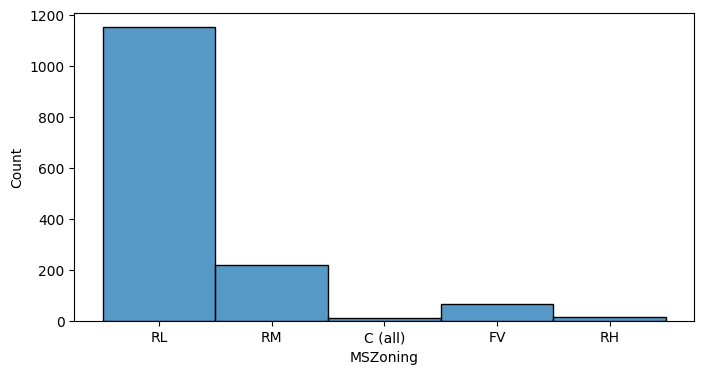

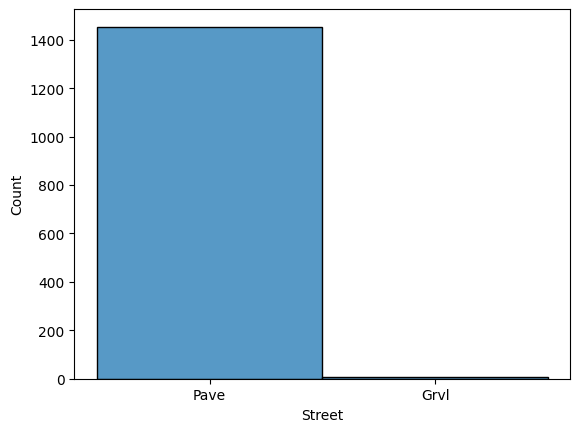

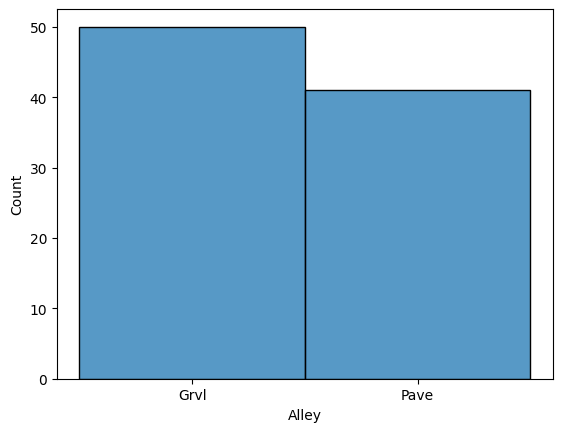

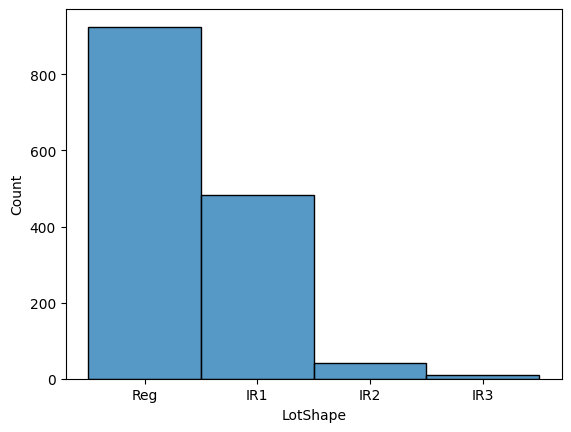

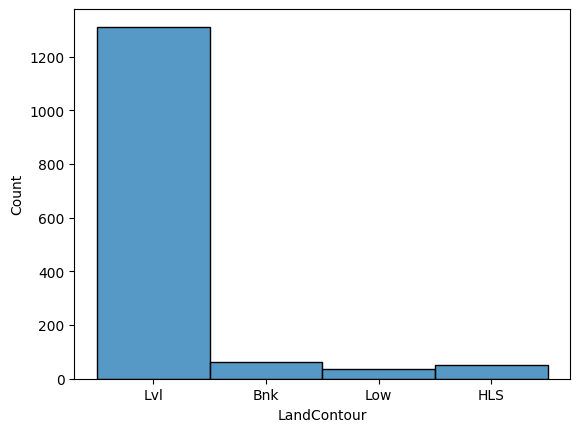

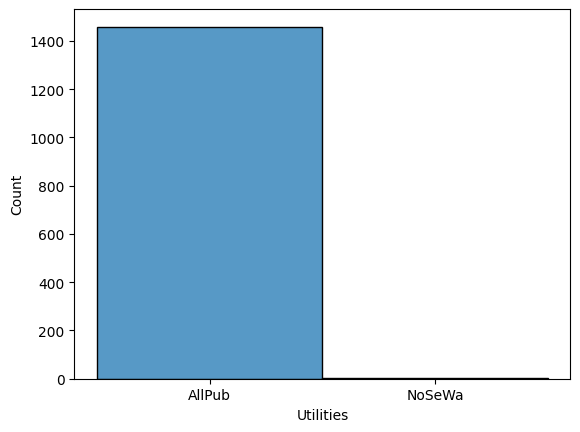

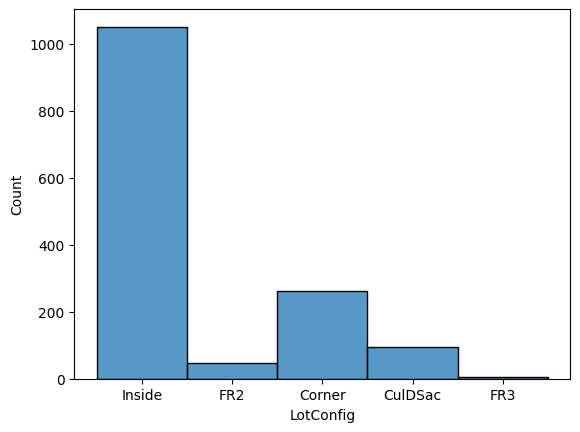

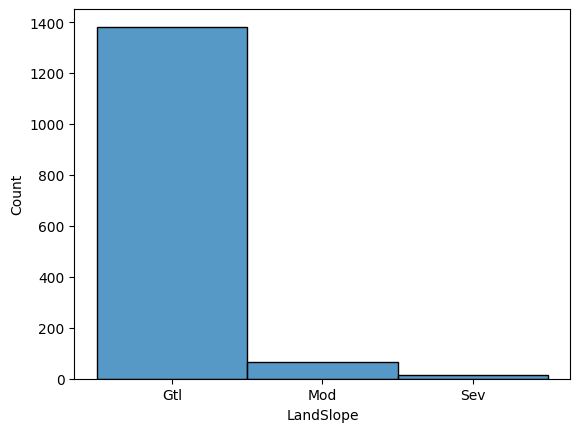

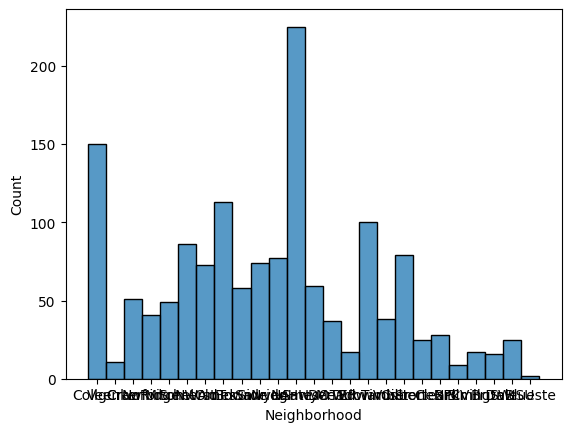

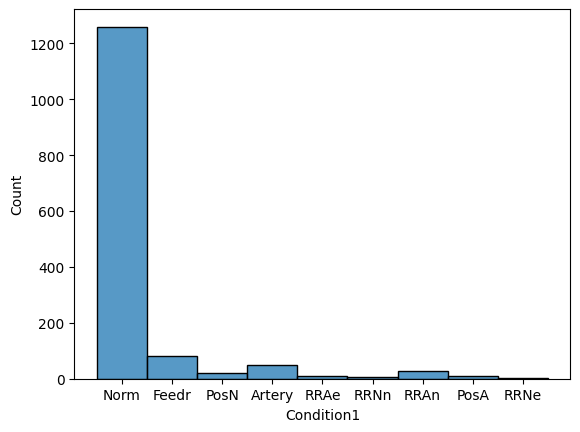

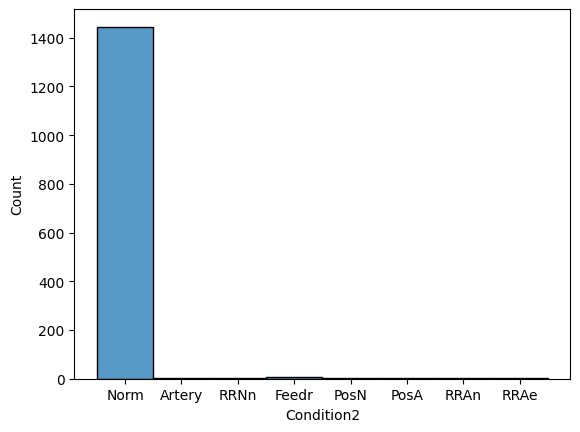

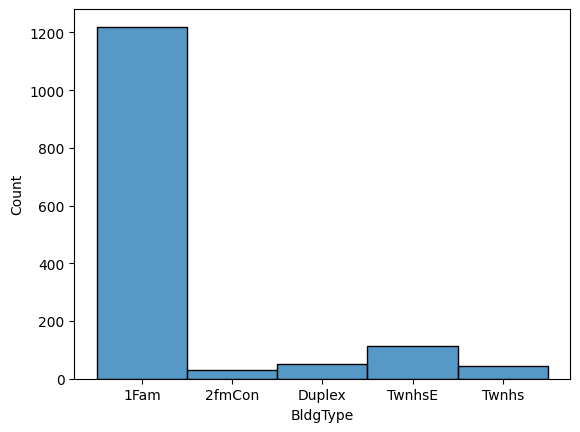

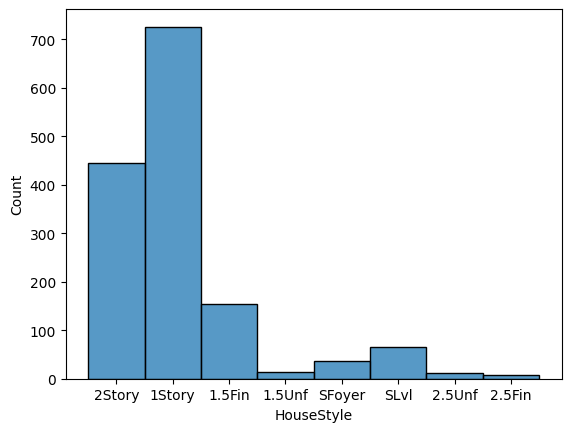

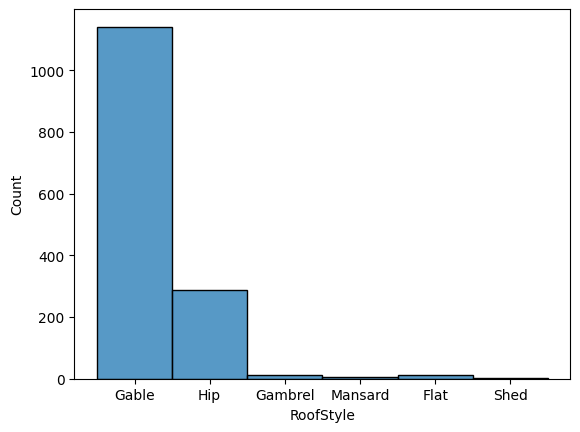

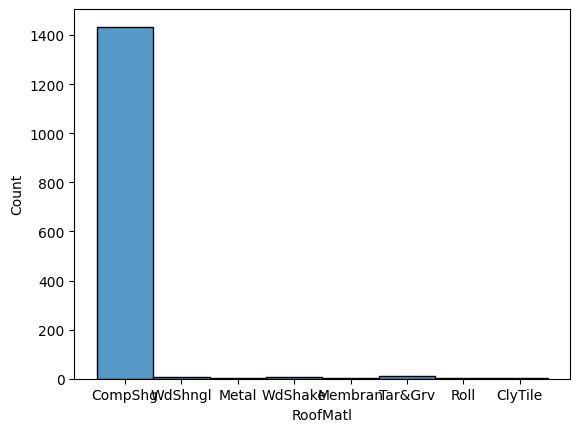

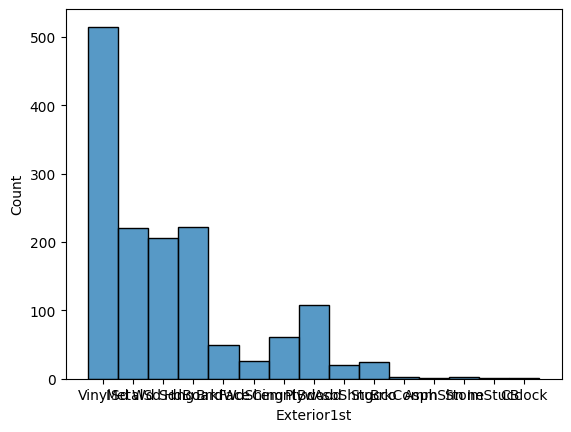

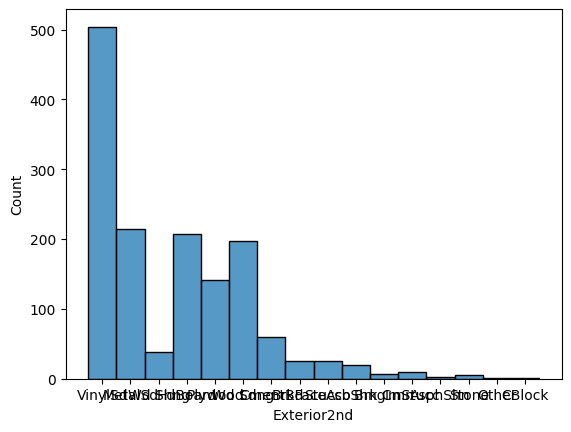

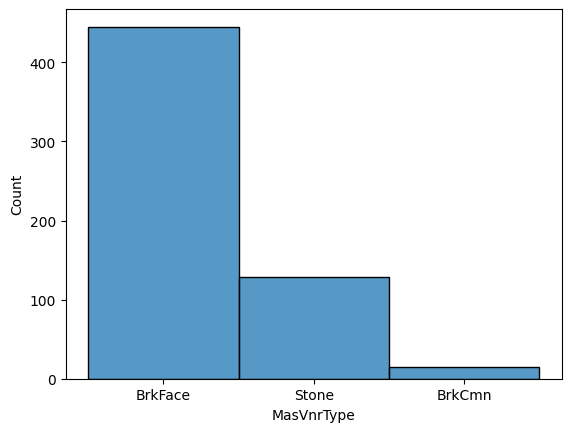

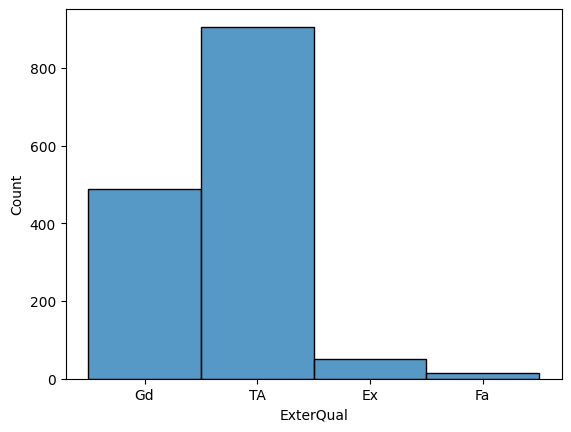

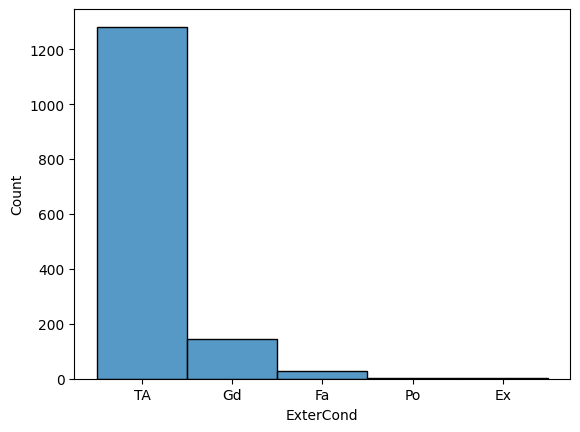

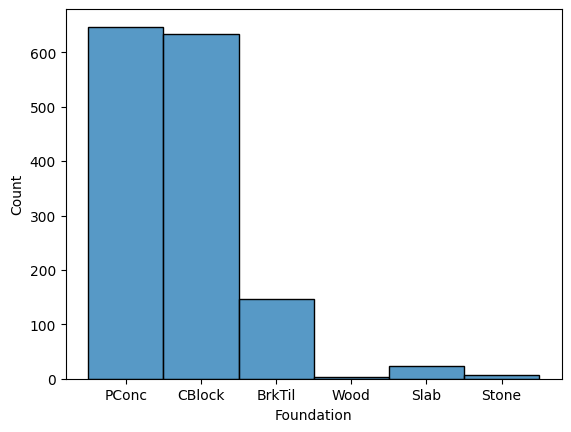

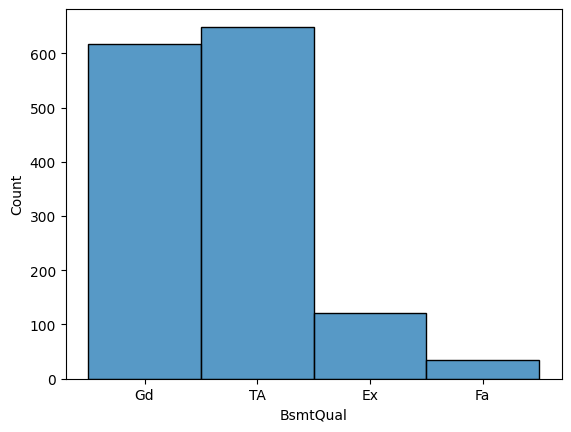

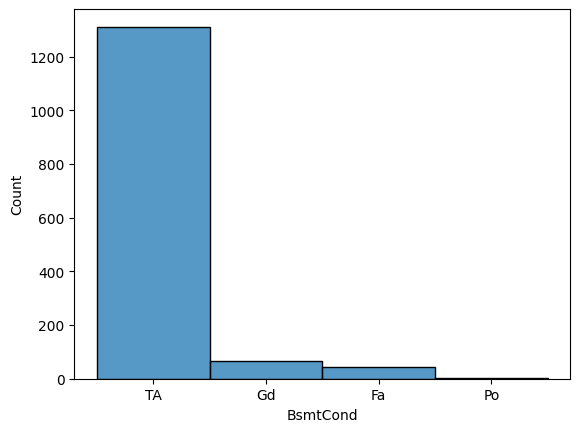

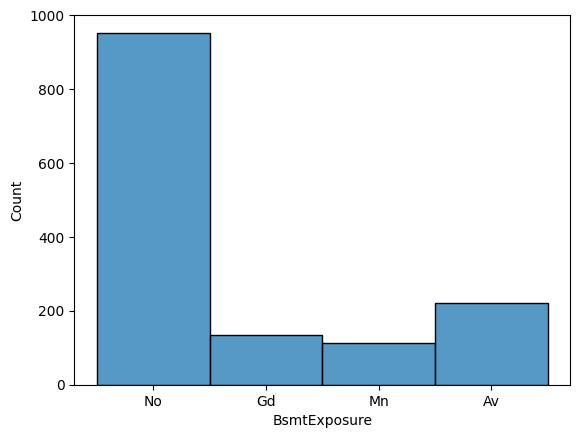

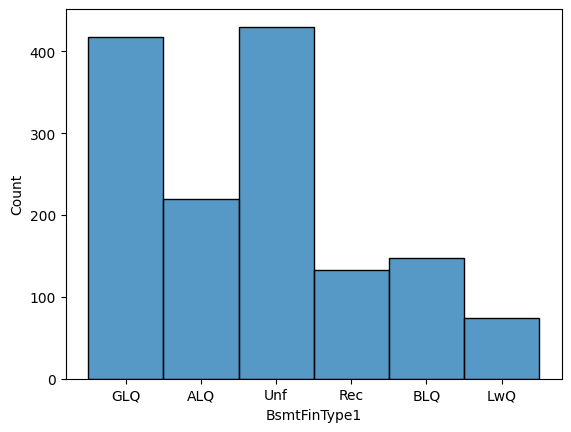

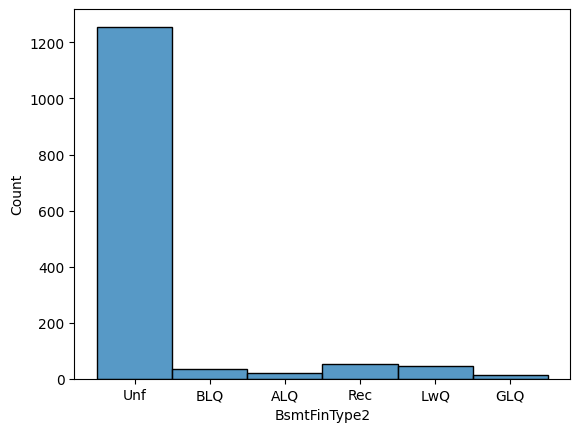

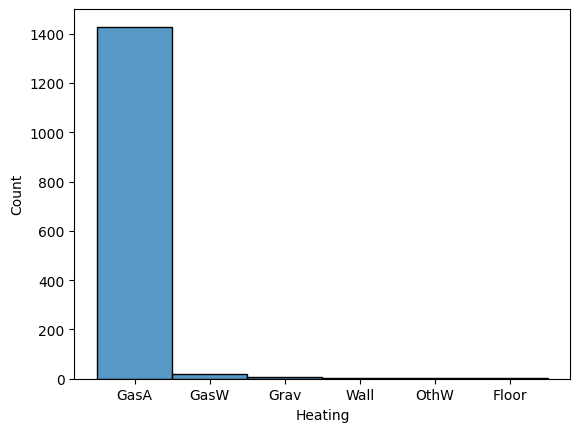

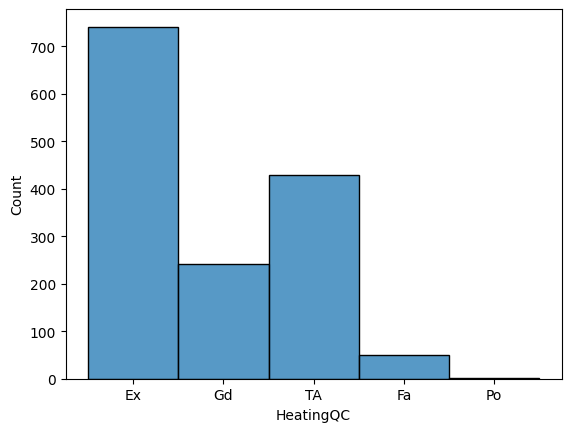

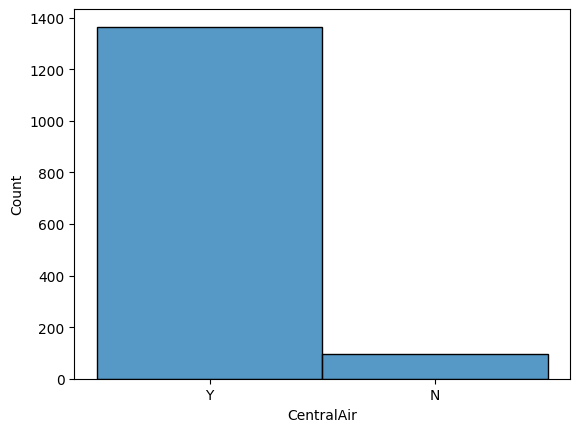

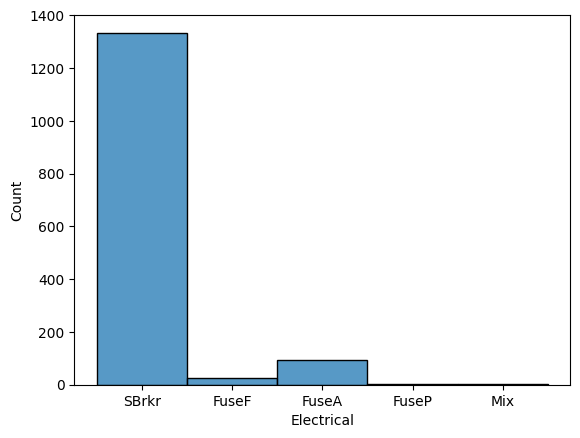

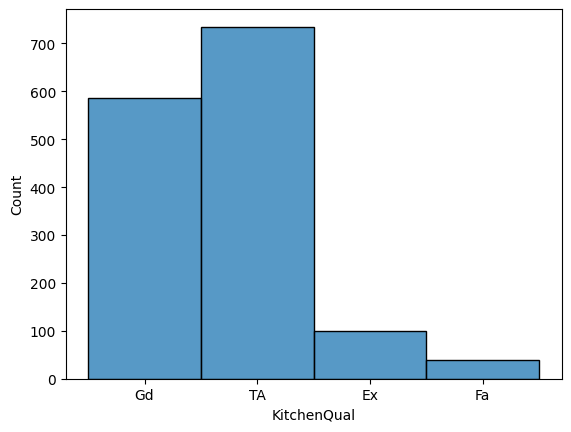

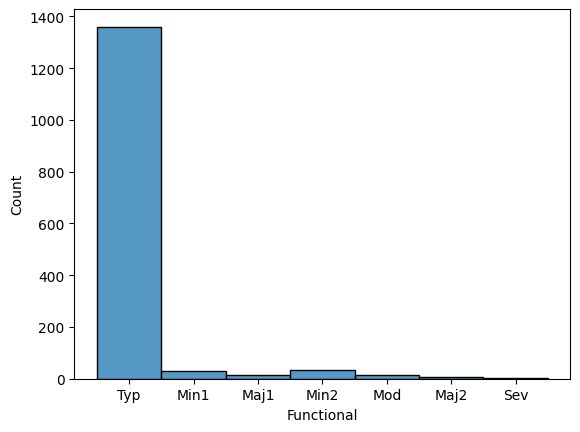

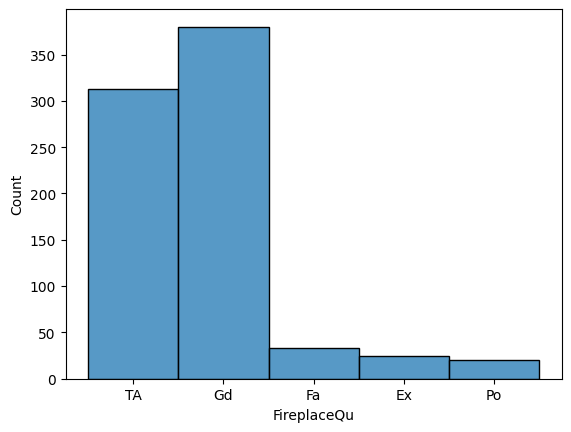

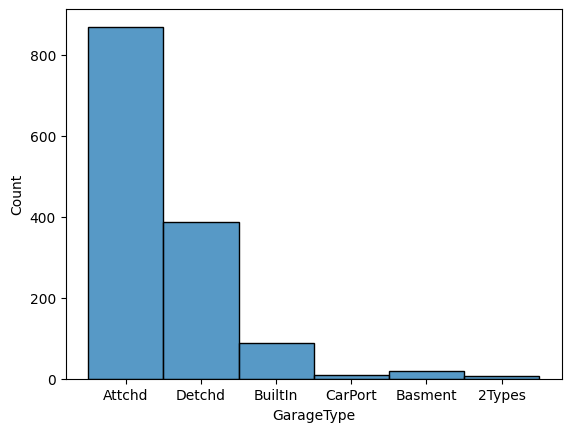

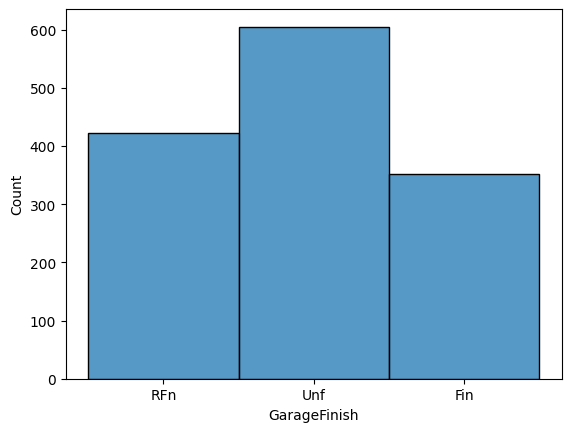

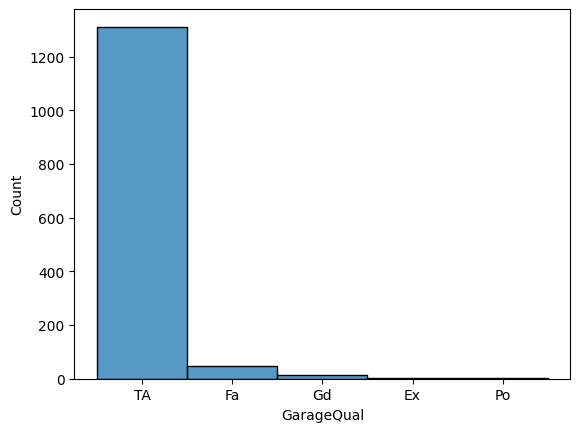

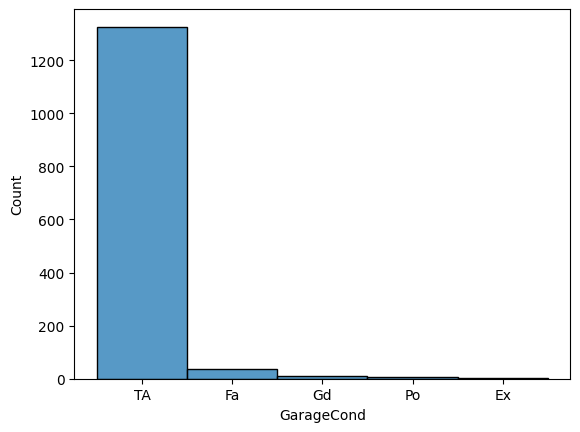

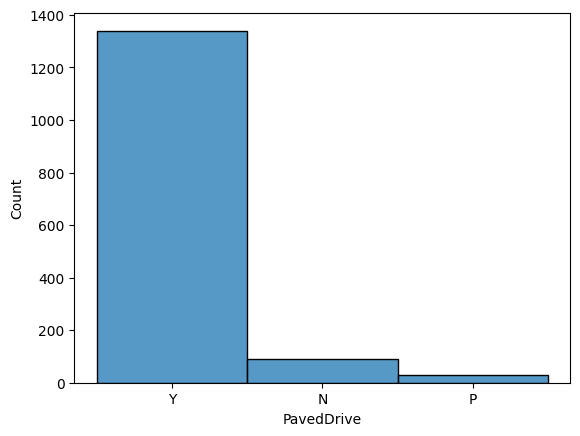

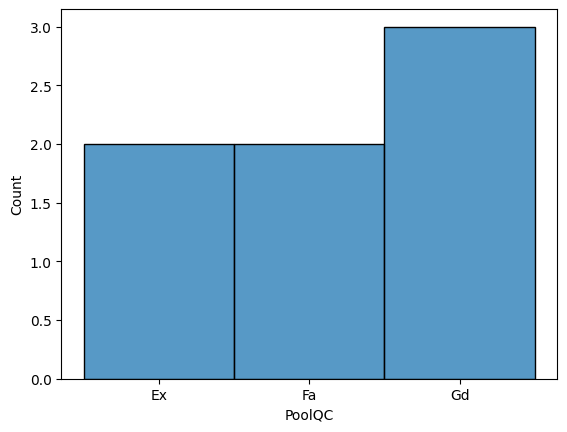

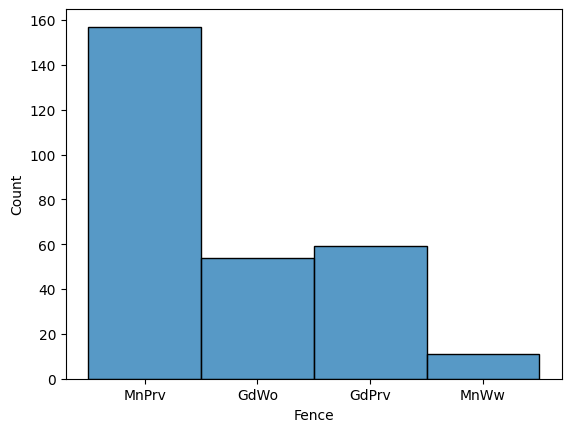

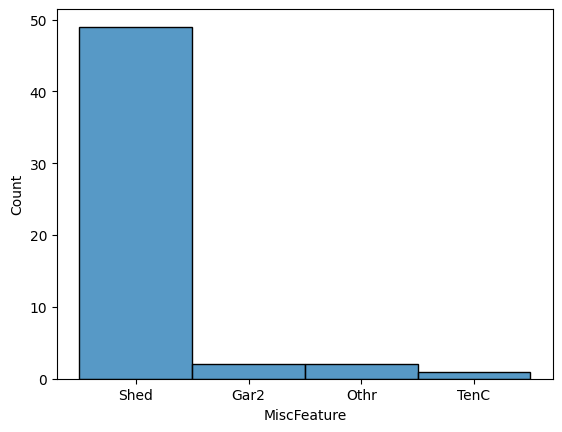

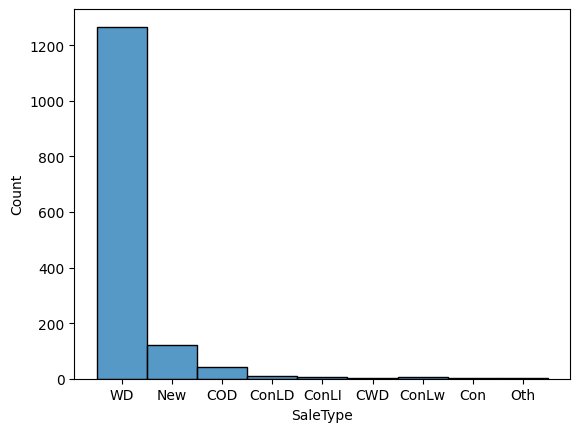

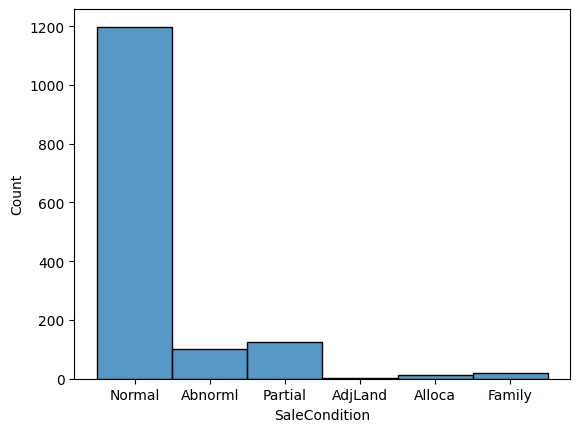

In [31]:
plt.figure(figsize=(8, 4))

for c in categorical_cols:
  sns.histplot(df[c])
  plt.show()

In [32]:
# очистка

df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'])

df = df.drop(columns=['Id', 'Street', 'GarageQual', 'Utilities', 'LandSlope', 'Condition1',
                      'Condition2', 'RoofMatl', 'GarageCond', 'BsmtFinType2', 'BsmtFinSF2',
                      'Heating', 'BsmtCond', 'MasVnrArea', 'Electrical', 'LowQualFinSF',
                      'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond'])

## Другой подход

In [33]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
features = df.columns.difference(['SalePrice'])
target = 'SalePrice'

categorical_features = df[features].select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = df[feature].astype(str)

In [35]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
categorical_features = np.where(X.dtypes == 'object')[0]

In [37]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', nan_mode='Min', verbose=False)
model.fit(train_pool)

In [38]:
y_pred = model.predict(test_pool)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

MAE: 17666.19
R2: 0.90


In [39]:
feature_importance = model.get_feature_importance()
feature_names = X.columns

for name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {name}, \t Importance: {importance:.2f}")

Feature: 1stFlrSF, 	 Importance: 3.05
Feature: 2ndFlrSF, 	 Importance: 3.35
Feature: 3SsnPorch, 	 Importance: 0.10
Feature: Alley, 	 Importance: 0.00
Feature: BedroomAbvGr, 	 Importance: 0.60
Feature: BldgType, 	 Importance: 0.05
Feature: BsmtCond, 	 Importance: 0.00
Feature: BsmtExposure, 	 Importance: 0.40
Feature: BsmtFinSF1, 	 Importance: 6.84
Feature: BsmtFinSF2, 	 Importance: 0.15
Feature: BsmtFinType1, 	 Importance: 0.00
Feature: BsmtFinType2, 	 Importance: 0.00
Feature: BsmtFullBath, 	 Importance: 0.79
Feature: BsmtHalfBath, 	 Importance: 0.00
Feature: BsmtQual, 	 Importance: 1.09
Feature: BsmtUnfSF, 	 Importance: 0.33
Feature: CentralAir, 	 Importance: 0.81
Feature: Condition1, 	 Importance: 0.21
Feature: Condition2, 	 Importance: 0.00
Feature: Electrical, 	 Importance: 0.00
Feature: EnclosedPorch, 	 Importance: 0.00
Feature: ExterCond, 	 Importance: 0.00
Feature: ExterQual, 	 Importance: 1.51
Feature: Exterior1st, 	 Importance: 0.00
Feature: Exterior2nd, 	 Importance: 0.00
Fe

In [40]:
feat = []
imp = []

for name, importance in zip(feature_names, feature_importance):
    if importance > 1:
        feat.append(name)
        imp.append(importance)
        print(f"Feature: {name}, \t Importance: {importance:.2f}")

Feature: 1stFlrSF, 	 Importance: 3.05
Feature: 2ndFlrSF, 	 Importance: 3.35
Feature: BsmtFinSF1, 	 Importance: 6.84
Feature: BsmtQual, 	 Importance: 1.09
Feature: ExterQual, 	 Importance: 1.51
Feature: Fireplaces, 	 Importance: 3.28
Feature: FullBath, 	 Importance: 1.31
Feature: GarageArea, 	 Importance: 2.82
Feature: GarageCars, 	 Importance: 4.61
Feature: GarageFinish, 	 Importance: 1.87
Feature: GarageYrBlt, 	 Importance: 2.41
Feature: GrLivArea, 	 Importance: 14.31
Feature: HalfBath, 	 Importance: 1.11
Feature: LotArea, 	 Importance: 4.67
Feature: OverallCond, 	 Importance: 1.22
Feature: OverallQual, 	 Importance: 26.04
Feature: TotRmsAbvGrd, 	 Importance: 2.26
Feature: TotalBsmtSF, 	 Importance: 5.69
Feature: YearBuilt, 	 Importance: 1.54
Feature: YearRemodAdd, 	 Importance: 2.23


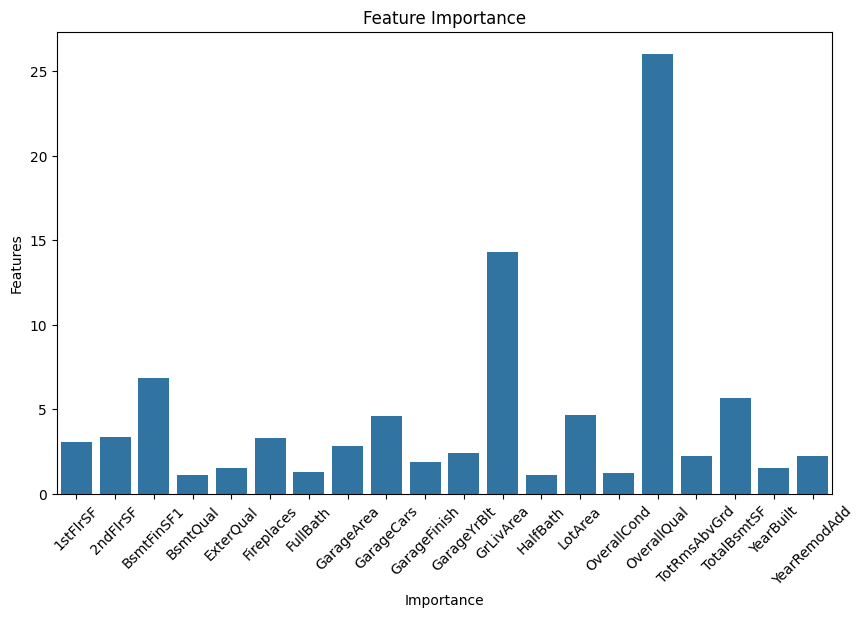

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat, y=imp)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.xticks(rotation = 45)
plt.ylabel('Features')
plt.show()

In [46]:
df = df[['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtQual',
 'ExterQual',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageFinish',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'LotArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']]

In [47]:
df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtQual,ExterQual,Fireplaces,FullBath,GarageArea,GarageCars,GarageFinish,...,GrLivArea,HalfBath,LotArea,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,706,Gd,Gd,0,2,548,2,RFn,...,1710,1,8450,5,7,8,856,2003,2003,208500
1,1262,0,978,Gd,TA,1,2,460,2,RFn,...,1262,0,9600,8,6,6,1262,1976,1976,181500
2,920,866,486,Gd,Gd,1,2,608,2,RFn,...,1786,1,11250,5,7,6,920,2001,2002,223500
3,961,756,216,TA,TA,1,1,642,3,Unf,...,1717,0,9550,5,7,7,756,1915,1970,140000
4,1145,1053,655,Gd,Gd,1,2,836,3,RFn,...,2198,1,14260,5,8,9,1145,2000,2000,250000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   int64  
 2   BsmtFinSF1    1460 non-null   int64  
 3   BsmtQual      1460 non-null   object 
 4   ExterQual     1460 non-null   object 
 5   Fireplaces    1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageCars    1460 non-null   int64  
 9   GarageFinish  1460 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GrLivArea     1460 non-null   int64  
 12  HalfBath      1460 non-null   int64  
 13  LotArea       1460 non-null   int64  
 14  OverallCond   1460 non-null   int64  
 15  OverallQual   1460 non-null   int64  
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  TotalBsmtSF   1460 non-null   int64  
 18  YearBuilt     1460 non-null 

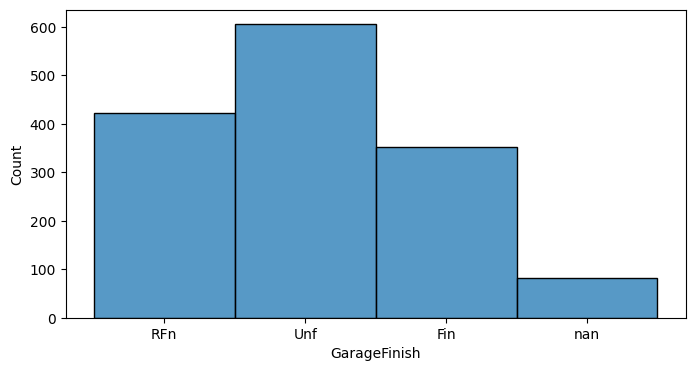

In [51]:
plt.figure(figsize=(8, 4))

sns.histplot(df['GarageFinish'])
plt.show()

In [52]:
df = pd.get_dummies(df, columns = ['GarageFinish', 'BsmtQual', 'ExterQual'], prefix = None, prefix_sep = '_', drop_first = True)
df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,...,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,856,854,706,0,2,548,2,2003.0,1710,1,...,True,False,False,False,True,False,False,False,True,False
1,1262,0,978,1,2,460,2,1976.0,1262,0,...,True,False,False,False,True,False,False,False,False,True
2,920,866,486,1,2,608,2,2001.0,1786,1,...,True,False,False,False,True,False,False,False,True,False
3,961,756,216,1,1,642,3,1998.0,1717,0,...,False,True,False,False,False,True,False,False,False,True
4,1145,1053,655,1,2,836,3,2000.0,2198,1,...,True,False,False,False,True,False,False,False,True,False


In [57]:
df['logSalePrice'] = np.log1p(df['SalePrice'])

In [53]:
corr_matrix = df.corr()
corr_matrix

,1stFlrSF,2ndFlrSF,BsmtFinSF1,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,...,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
1stFlrSF,1.000000,-0.202646,0.445863,0.410531,0.380637,0.489782,0.439317,0.233449,0.566024,-0.119916,...,0.128655,-0.253960,-0.154846,-0.090294,0.048752,-0.222508,-0.023876,-0.079490,0.208732,-0.312844
2ndFlrSF,-0.202646,1.000000,-0.137079,0.194561,0.421378,0.138347,0.183926,0.070832,0.687501,0.609707,...,-0.008631,-0.081906,-0.060821,0.001727,0.147068,-0.150144,-0.060788,-0.019954,0.182685,-0.188984
BsmtFinSF1,0.445863,-0.137079,1.000000,0.260011,0.058543,0.296970,0.224054,0.153484,0.208171,0.004262,...,0.057695,-0.179000,-0.108043,-0.107562,0.054232,-0.121785,-0.156899,-0.075625,0.062388,-0.128084
Fireplaces,0.410531,0.194561,0.260011,1.000000,0.243671,0.269141,0.300789,0.046822,0.461679,0.203649,...,0.061681,-0.193903,-0.184110,-0.079595,0.090686,-0.142974,-0.085759,-0.071785,0.152868,-0.200168
FullBath,0.380637,0.421378,0.058543,0.243671,1.000000,0.405656,0.469672,0.484557,0.630012,0.136381,...,0.212736,-0.388460,-0.112846,-0.079496,0.384593,-0.494883,0.016558,-0.088197,0.425119,-0.466339
GarageArea,0.489782,0.138347,0.296970,0.269141,0.405656,1.000000,0.882475,0.564567,0.468997,0.163549,...,0.238782,-0.203858,-0.536333,-0.067068,0.205292,-0.362053,-0.084830,-0.093315,0.370531,-0.445260
GarageCars,0.439317,0.183926,0.224054,0.300789,0.469672,0.882475,1.000000,0.588920,0.467247,0.219178,...,0.208872,-0.221682,-0.573287,-0.077016,0.300462,-0.448099,-0.078075,-0.119855,0.424951,-0.481825
GarageYrBlt,0.233449,0.070832,0.153484,0.046822,0.484557,0.564567,0.588920,1.000000,0.231197,0.196785,...,0.241474,-0.542316,NaN,-0.190121,0.496236,-0.600124,-0.076169,-0.037021,0.536456,-0.596502
GrLivArea,0.566024,0.687501,0.208171,0.461679,0.630012,0.468997,0.467247,0.231197,1.000000,0.415772,...,0.081076,-0.251845,-0.151015,-0.065510,0.149140,-0.278141,-0.069417,-0.062396,0.302516,-0.386146
HalfBath,-0.119916,0.609707,0.004262,0.203649,0.136381,0.163549,0.219178,0.196785,0.415772,1.000000,...,0.082430,-0.181548,-0.107212,-0.065919,0.194085,-0.171331,-0.122811,-0.046979,0.173747,-0.184993


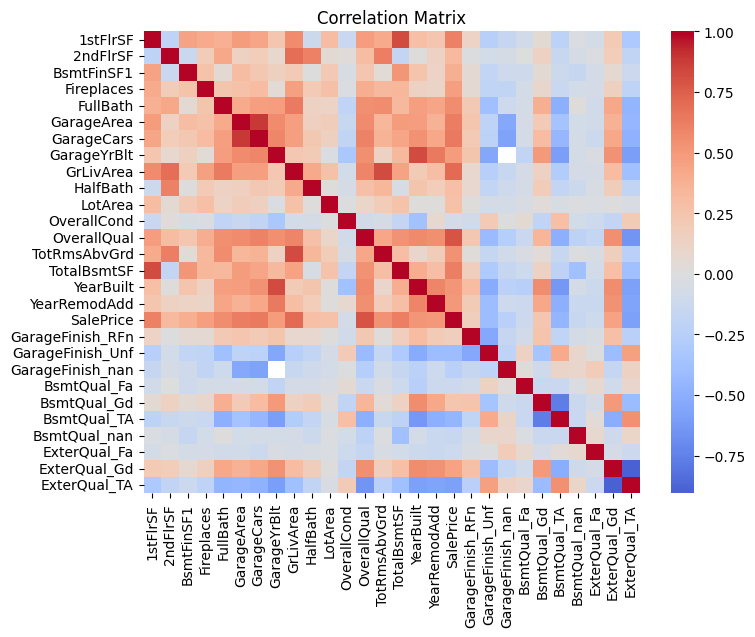

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Обучение моделей

In [58]:
X = df[['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'LotArea', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_nan', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtQual_nan', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA']]
y = df['logSalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
print(best.get_params())

y_pred = best.predict(X_test)
print('R2 = ', r2_score(np.expm1(y_test), np.expm1(y_pred)))

И т.д.